In [1]:
# 適宜自分のApplicationPATHまで変更
APP_PATH = '/root'

import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
import torch.nn.functional as F
from torch import optim

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from PIL import Image
import pandas as pd

In [2]:
# GPUの確認

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device) 

cuda


In [3]:
# 画像データ(npzのバイナリファイル)の読み込み

datasets_npz_x1 = np.load(APP_PATH + '/dataset_npz/x.1_dataset/sc_x10_960_x1.npz')

CATEGORIES = ["S10C","S15C","S25C","S35C","S45C","S55C"]

images = datasets_npz_x1['x']
labels = datasets_npz_x1['y']

# transpose_images = np.empty(shape=1, dtype=float)
# print("transpose_images: {}".format(transpose_images))
images_list = []
labels_list = []

# NUM_DATA = 10
NUM_DATA = 60

# 正規化手法定義 MinMaxScaler(0<=data<=1)
mmscaler = preprocessing.MinMaxScaler()

for i, image in enumerate(images):
    # CPUが使い果たされてしまうので200までを使用
    if i == NUM_DATA:
        break

    # 正規化
    # print(f'image: ')
    # print(image)
    image = mmscaler.fit_transform(image)
    # print(f'image transform: ')
    # print(image)
    
    image = Image.fromarray(image)
    # print("image dtype: {}".format(type(image)))
    image = image.convert("RGB")

    # どうするか比較する(GPUで回らない可能性あり)
    # 32x32にリサイズ
    # image = image.resize((32, 32))
    
    # print("image mode: {}".format(image.mode)) # むりやり3チャンネルにしているので表記上はRGBだが実際はL
    image = np.asarray(image, np.uint8)
    # print("image shape: {}".format(image.shape))
    image = np.transpose(image, (2, 0, 1))
    print("image transpose shape: {}".format(image.shape))
    # transpose_images = np.append(transpose_images, image, axis=0)
    images_list.append(image)
    labels_list.append(labels[i])
    
    print(i, '/', len(images))


transpose_images = np.array(images_list)
transpose_labels = np.array(labels_list)

# うまくいっていたら保存
print("transpose_images dtype: {}".format(type(transpose_images)))
print("transpose_images shape: {}".format(transpose_images.shape))
print("transpose_images: {}".format(transpose_images))

print("transpose_labels dtype: {}".format(type(transpose_labels)))
print("transpose_labels shape: {}".format(transpose_labels.shape))
print("transpose_labels: {}".format(transpose_labels))
np.savez(APP_PATH, 'data/temp/np_savez', transpose_images, datasets_npz_x1['y'])

# image = Image.fromarray(image)
# print("image dtype: {}".format(type(image)))
# image = image.convert("RGB")
# print("image mode: {}".format(image.mode)) # むりやり3チャンネルにしているので表記上はRGBだが実際はL
# image = np.asarray(image, np.uint8)
# print("image shape: {}".format(image.shape))
# image = np.transpose(image, (2, 0, 1))
# print("image transpose shape: {}".format(image.shape))

image transpose shape: (3, 960, 960)
0 / 290
image transpose shape: (3, 960, 960)
1 / 290
image transpose shape: (3, 960, 960)
2 / 290
image transpose shape: (3, 960, 960)
3 / 290
image transpose shape: (3, 960, 960)
4 / 290
image transpose shape: (3, 960, 960)
5 / 290
image transpose shape: (3, 960, 960)
6 / 290
image transpose shape: (3, 960, 960)
7 / 290
image transpose shape: (3, 960, 960)
8 / 290
image transpose shape: (3, 960, 960)
9 / 290
image transpose shape: (3, 960, 960)
10 / 290
image transpose shape: (3, 960, 960)
11 / 290
image transpose shape: (3, 960, 960)
12 / 290
image transpose shape: (3, 960, 960)
13 / 290
image transpose shape: (3, 960, 960)
14 / 290
image transpose shape: (3, 960, 960)
15 / 290
image transpose shape: (3, 960, 960)
16 / 290
image transpose shape: (3, 960, 960)
17 / 290
image transpose shape: (3, 960, 960)
18 / 290
image transpose shape: (3, 960, 960)
19 / 290
image transpose shape: (3, 960, 960)
20 / 290
image transpose shape: (3, 960, 960)
21 / 29

In [4]:
# transformsなしの自作のデータセット作成
data = torch.tensor(transpose_images, dtype=torch.float32)
label = torch.tensor(transpose_labels, dtype=torch.int64)

print('data.shape:', data.shape, 'label.shape:', label.shape)

# Datasetを作成
dataset = torch.utils.data.TensorDataset(data, label)

X_sample, y_sample = dataset[0]
print(X_sample.shape, y_sample.shape)
print(X_sample)
print(y_sample)

data.shape: torch.Size([60, 3, 960, 960]) label.shape: torch.Size([60])
torch.Size([3, 960, 960]) torch.Size([])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor(5)


In [5]:
# DataLoader ミニバッチ学習

num_train = int(len(dataset) * 0.8)
num_test = int(len(dataset) - num_train)

print('num_train:', num_train)
print('num_test:', num_test)

# ランダムにするらめにシードの固定をした
torch.manual_seed(0)
# データセットの分割
train, test = torch.utils.data.random_split(dataset, [num_train, num_test])
print('train:', train)
print('test:', test)

num_train: 48
num_test: 12
train: <torch.utils.data.dataset.Subset object at 0x7f063ad448b0>
test: <torch.utils.data.dataset.Subset object at 0x7f063ad44af0>


In [6]:
# ミニバッチ学習

# バッチサイズの定義(目安は全データの1/10だが正解がない)
# batch_size = 2
batch_size = 6
train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True, drop_last=True)
# val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

# 1つ目のバッチサイズに分割したデータを確認
x, t = next(iter(train_loader))

print('x:', x)
print('t:', t)

x: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
     

In [7]:
# 2.3 ニューラルネットワークの定義

num_classes = 6    # CIFAR10のクラスの数を指定

# n_input = 32 * 32 * 3 # 全結合するために使用する
n_input = 960 * 960 * 3 # 全結合するために使用する
n_output = 6
# 中間層のノード数(何でもよい：調べる必要あり)
# n_hidden = 128
n_hidden = 128


# https://www.youtube.com/watch?v=6roIEgXy7wA
class CNN(nn.Module):
    def __init__(self, n_output, n_hidden):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.maxpool = nn.MaxPool2d((2, 2))
        # self.flatten = nn.Flatten()
        # self.flatten = nn.Flatten()
        # self.l1 = nn.Linear(54378240, n_hidden)
        # self.l1 = nn.Linear(10875648, n_hidden)# btchsize 6
        # self.l1 = nn.Linear(3625216, n_hidden) # btchsize 2

        self.l1 = nn.Linear(738048, n_hidden)# btchsize 6(256)
        self.l1 = nn.Linear(6912, n_hidden)# btchsize 6(256)　32にリサイズ

        
        self.l2 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace=True)

    # 順伝搬を定義
    def forward(self, x):
        x = self.maxpool(self.relu(self.conv1(x)))
        x = self.maxpool(self.relu(self.conv2(x)))
        x = torch.flatten(x)
        x = self.relu(self.l1(x))
        x = self.l2(x)
        return x


# (6, 3, 960, 960)
print("x before shape: {}".format(x.shape))

# flattenに入れる前の入力画像(特徴MAP)のサイズ確認
conv1 = nn.Conv2d(3, 32, 3)
conv2 = nn.Conv2d(32, 32, 3)
maxpool = nn.MaxPool2d((2, 2))
relu = nn.ReLU(inplace=True)

x1 = conv1(x)
x2 = relu(x1)
x3 = conv2(x2)
x4 = relu(x3)
x5 = maxpool(x4)
# x3 = torch.flatten(x)

print("x1 shape: {}".format(x1.shape))
print("x2 shape: {}".format(x2.shape))
print("x3 shape: {}".format(x3.shape))
print("x4 shape: {}".format(x4.shape))
print("x5 shape: {}".format(x5.shape))

features = nn.Sequential(
    conv1,
    relu,
    conv2,
    relu,
    maxpool
)

outputs = features(x) 
print(outputs)

flatten = nn.Flatten()
outputs2 = flatten(outputs)

print("outputs shape: {}".format(outputs.shape))
print("outputs2 shape: {}".format(outputs2.shape))


net = CNN(n_output, n_hidden).to(device)
print(net)

x before shape: torch.Size([6, 3, 960, 960])
x1 shape: torch.Size([6, 32, 958, 958])
x2 shape: torch.Size([6, 32, 958, 958])
x3 shape: torch.Size([6, 32, 956, 956])
x4 shape: torch.Size([6, 32, 956, 956])
x5 shape: torch.Size([6, 32, 478, 478])
tensor([[[[0.0361, 0.0361, 0.0361,  ..., 0.0361, 0.0361, 0.0361],
          [0.0361, 0.0361, 0.0361,  ..., 0.0361, 0.0361, 0.0361],
          [0.0361, 0.0361, 0.0361,  ..., 0.0361, 0.0361, 0.0361],
          ...,
          [0.0361, 0.0361, 0.0361,  ..., 0.0361, 0.0227, 0.0671],
          [0.0361, 0.0361, 0.0361,  ..., 0.0361, 0.0687, 0.0277],
          [0.0361, 0.0361, 0.0361,  ..., 0.0361, 0.0239, 0.0807]],

         [[0.0477, 0.0477, 0.0477,  ..., 0.0477, 0.0477, 0.0477],
          [0.0477, 0.0477, 0.0477,  ..., 0.0477, 0.0477, 0.0477],
          [0.0477, 0.0477, 0.0477,  ..., 0.0477, 0.0477, 0.0477],
          ...,
          [0.0477, 0.0477, 0.0477,  ..., 0.0546, 0.1288, 0.1228],
          [0.0477, 0.0477, 0.0477,  ..., 0.0578, 0.1410, 0.1047

In [8]:
# 2.4 損失関数と最適化関数の定義

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# 活性化関数の定義(最適化アルゴリズムの設定(確率的勾降下法))
# lr = 0.01
lr = 0.001
# lr = 0.0001
# optimizer = optim.Adam(net.parameters())
optimizer = optim.SGD(net.parameters(), lr=lr)

In [9]:
# 学習用関数
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):

    # tqdmライブラリのインポート
    from tqdm.notebook import tqdm

    base_epochs = len(history)
  
    for epoch in range(base_epochs, num_epochs+base_epochs):
        # 1エポックあたりの正解数(精度計算用)
        n_train_acc, n_val_acc = 0, 0
        # 1エポックあたりの累積損失(平均化前)
        train_loss, val_loss = 0, 0
        # 1エポックあたりのデータ累積件数
        n_train, n_test = 0, 0

        #訓練フェーズ
        net.train()

        for inputs, labels in train_loader:
        # for inputs, labels in tqdm(train_loader):
        # for inputs_test, labels_test in test_loader:
            # 1バッチあたりのデータ件数
            train_batch_size = len(labels)
            # 1エポックあたりのデータ累積件数
            n_train += train_batch_size
    
            # GPUヘ転送
            inputs = inputs.to(device)
            labels = labels.to(device)

            # 勾配の初期化
            optimizer.zero_grad()

            # 予測計算
            outputs = net(inputs)

            # 損失計算
            loss = criterion(outputs, labels)

            # 勾配計算
            loss.backward()

            # パラメータ修正
            optimizer.step()

            # 予測ラベル導出
            predicted = torch.max(outputs, 1)[1]

            # 平均前の損失と正解数の計算
            # lossは平均計算が行われているので平均前の損失に戻して加算
            train_loss += loss.item() * train_batch_size 
            n_train_acc += (predicted == labels).sum().item() 

        #予測フェーズ
        net.eval()

        for inputs_test, labels_test in test_loader:
            # 1バッチあたりのデータ件数
            test_batch_size = len(labels_test)
            # 1エポックあたりのデータ累積件数
            n_test += test_batch_size

            # GPUヘ転送
            inputs_test = inputs_test.to(device)
            labels_test = labels_test.to(device)

            # 予測計算
            outputs_test = net(inputs_test)

            # 損失計算
            loss_test = criterion(outputs_test, labels_test)
 
            # 予測ラベル導出
            predicted_test = torch.max(outputs_test, 1)[1]

            #  平均前の損失と正解数の計算
            # lossは平均計算が行われているので平均前の損失に戻して加算
            val_loss +=  loss_test.item() * test_batch_size
            n_val_acc +=  (predicted_test == labels_test).sum().item()

        # 精度計算
        train_acc = n_train_acc / n_train
        val_acc = n_val_acc / n_test
        # 損失計算
        avg_train_loss = train_loss / n_train
        avg_val_loss = val_loss / n_test
        # 結果表示
        print (f'Epoch [{(epoch+1)}/{num_epochs+base_epochs}], loss: {avg_train_loss:.5f} acc: {train_acc:.5f} val_loss: {avg_val_loss:.5f}, val_acc: {val_acc:.5f}')
        # 記録
        item = np.array([epoch+1, avg_train_loss, train_acc, avg_val_loss, val_acc])
        history = np.vstack((history, item))
    return history

In [10]:
# 学習ログ解析

def evaluate_history(history):
    #損失と精度の確認
    print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}') 
    print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

    num_epochs = len(history)
    unit = num_epochs / 10

    # 学習曲線の表示 (損失)
    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,1], 'b', label='訓練')
    plt.plot(history[:,0], history[:,3], 'k', label='検証')
    plt.xticks(np.arange(0,num_epochs+1, unit))
    plt.xlabel('繰り返し回数')
    plt.ylabel('損失')
    plt.title('学習曲線(損失)')
    plt.legend()
    plt.show()

    # 学習曲線の表示 (精度)
    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,2], 'b', label='訓練')
    plt.plot(history[:,0], history[:,4], 'k', label='検証')
    plt.xticks(np.arange(0,num_epochs+1,unit))
    plt.xlabel('繰り返し回数')
    plt.ylabel('精度')
    plt.title('学習曲線(精度)')
    plt.legend()
    plt.show()

In [11]:
# イメージとラベル表示
def show_images_labels(loader, classes, net, device):

    # データローダーから最初の1セットを取得する
    for images, labels in loader:
        break
    # 表示数は50個とバッチサイズのうち小さい方
    n_size = min(len(images), 50)

    if net is not None:
      # デバイスの割り当て
      inputs = images.to(device)
      labels = labels.to(device)

      # 予測計算
      outputs = net(inputs)
      predicted = torch.max(outputs,1)[1]
      #images = images.to('cpu')

    # 最初のn_size個の表示
    plt.figure(figsize=(20, 15))
    for i in range(n_size):
        ax = plt.subplot(5, 10, i + 1)
        label_name = classes[labels[i]]
        # netがNoneでない場合は、予測結果もタイトルに表示する
        if net is not None:
          predicted_name = classes[predicted[i]]
          # 正解かどうかで色分けをする
          if label_name == predicted_name:
            c = 'k'
          else:
            c = 'b'
          ax.set_title(label_name + ':' + predicted_name, c=c, fontsize=20)
        # netがNoneの場合は、正解ラベルのみ表示
        else:
          ax.set_title(label_name, fontsize=20)
        # TensorをNumPyに変換
        image_np = images[i].numpy().copy()
        # 軸の順番変更 (channel, row, column) -> (row, column, channel)
        img = np.transpose(image_np, (1, 2, 0))
        # 値の範囲を[-1, 1] -> [0, 1]に戻す
        img = (img + 1)/2
        # 結果表示
        plt.imshow(img)
        ax.set_axis_off()
    plt.show()


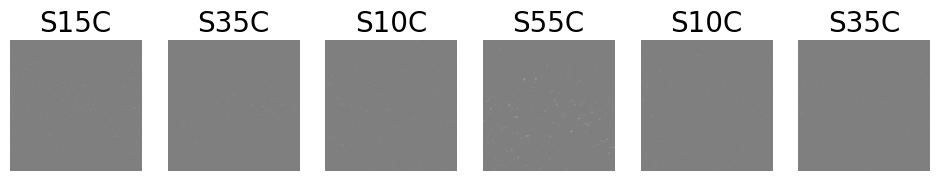

In [12]:
# 検証データ最初の50個の表示
show_images_labels(test_loader, CATEGORIES, None, None)

In [13]:
class CNN(nn.Module):
  def __init__(self, n_output, n_hidden):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 32, 3)
    self.conv2 = nn.Conv2d(32, 32, 3)
    self.relu = nn.ReLU(inplace=True)
    self.maxpool = nn.MaxPool2d((2,2))
    self.flatten = nn.Flatten()
    self.l1 = nn.Linear(10875648, n_hidden)
    self.l2 = nn.Linear(n_hidden, n_output)

    self.features = nn.Sequential(
        self.conv1,
        self.relu,
        self.conv2,
        self.relu,
        self.maxpool)
    
    self.classifier = nn.Sequential(
       self.l1,
       self.relu,
       self.l2)

  def forward(self, x):
    x1 = self.features(x)
    x2 = self.flatten(x1)
    x3 = self.classifier(x2)
    return x3

In [14]:
# 乱数初期化
# torch_seed()

# モデルインスタンス生成
net = CNN(n_output, n_hidden).to(device)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 学習率
lr = 0.01

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 1

# 評価結果記録用
history = np.zeros((0,5))

# 学習
# history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

In [15]:
# 評価

# evaluate_history(history)

In [16]:
# 最初の50個の表示

# show_images_labels(test_loader, CATEGORIES, net, device)

In [17]:
# # LeNet
# # 2.5 学習

# # 損失と正解率を保持するリストを作成
# train_loss_list = []        # 学習損失
# train_accuracy_list = []    # 学習データの正答率
# test_loss_list = []         # 評価損失
# test_accuracy_list = []     # テストデータの正答率

# # 学習(エポック)の実行
# epoch = 10
# # epoch = 1
# for i in range(epoch):
#     # エポックの進行状況を表示
#     print("-------------------------------")
#     print("Epoch: {}/{}".format(i+1, epoch))
    
#     # 損失と正解率の初期化
#     train_loss = 0      # 学習損失
#     train_accuracy = 0  # 学習データの正答率
#     test_loss = 0       # 評価損失
#     test_accuracy = 0   # テストデータの正答率
    
#     # ---------学習パート--------- #
#     # ニューラルネットワークを学習モードに設定
#     net.train()
#     # ミニバッチごとにデータをロードし学習
#     for images, labels in train_loader:
#         # GPUにTensorを転送
#         images = images.to(device)
#         labels = labels.to(device)
        
#         # 勾配を初期化
#         optimizer.zero_grad()
#         # データを入力して予測値を計算(順伝播)
#         y_pred_prob = net(images)
#         # 損失(誤差)を計算
#         print(f'y_pred_prob: ')
#         print(y_pred_prob)
#         print(f'labels: ')
#         print(labels)
#         print(type(labels))

#         # 正解クラスを確率分布に変換
#         # labels_one_hot = F.one_hot(labels, num_classes=6).float()

#         labels_float = labels.float()

#         print(labels_float)

        
#         # loss = criterion(y_pred_prob, labels)
#         loss = criterion(y_pred_prob, labels_float)
#         # 勾配の計算(逆伝搬)
#         loss.backward()
#         # パラメータ(重み)の更新
#         optimizer.step()
        
#         # ミニバッチごとの損失を蓄積
#         train_loss += loss.item()
        
#         # 予測したラベルを予測確率y_pred_probから計算
#         print(f'y_pred_prob: ')
#         print(y_pred_prob)
#         # print(y_pred_prob.dim())
#         # print(torch.max(y_pred_prob))
#         # print(torch.max(y_pred_prob, dim=0))
#         print(f'y_pred_prob max: {torch.max(y_pred_prob, dim=0)[0]}')
#         # print(type(labels))
        
#         # y_pred_labels = torch.max(y_pred_prob, dim=0)[0]
#         y_pred_labels = torch.max(y_pred_prob, dim=0)[1]
#         # ミニバッチごとに正解したラベル数をカウント
#         train_accuracy += torch.sum(y_pred_labels == labels).item() / len(labels)
    
#     # エポックごとの損失と正解率を計算(ミニバッチの平均の損失と正解率を計算)
#     epoch_train_loss = train_loss / len(train_loader)
#     epoch_train_accuracy = train_accuracy / len(train_loader)
#     # ---------学習パートはここまで--------- #
    
#     # ---------評価パート--------- #
#     # ニューラルネットワークを評価モードに設定
#     net.eval()
#     # 評価時の計算で自動微分機能をオフにする
#     with torch.no_grad():
#         for images, labels in test_loader:
#             # GPUにTensorを転送
#             images = images.to(device)
#             labels = labels.to(device)
#             # データを入力して予測値を計算(順伝播)
#             y_pred_prob = net(images)
#             # 損失(誤差)を計算
#             labels_float = labels.float()
#             loss = criterion(y_pred_prob, labels_float)
#             # loss = criterion(y_pred_prob, torch.LongTensor(labels))
#             # ミニバッチごとの損失を蓄積
#             test_loss += loss.item()
            
#             # 予測したラベルを予測確率y_pred_probから計算
#             y_pred_labels = torch.max(y_pred_prob, dim=0)[1]
#             # y_pred_labels = torch.max(y_pred_prob, dim=0)[0]
#             # y_pred_labels = torch.max(y_pred_prob, 1)[1]
#             # ミニバッチごとに正解したラベル数をカウント
#             test_accuracy += torch.sum(y_pred_labels == labels).item() / len(labels)
        
#     # エポックごとの損失と正解率を計算(ミニバッチの平均の損失と正解率を計算)
#     epoch_test_loss = test_loss / len(test_loader)
#     epoch_test_accuracy = test_accuracy / len(test_loader)
#     # ---------評価パートはここまで--------- #

#     # エポックごとに損失と正解率を表示
#     print("Train_Loss: {:.4f}, Train_Accuracy: {:.4f}".format(epoch_train_loss, epoch_train_accuracy))
#     print("Test_Loss: {:.4f}, Test_Accuracy: {:.4f}".format(epoch_test_loss, epoch_test_accuracy))

#     # 損失と正解率をリスト化して保存
#     train_loss_list.append(epoch_train_loss)
#     train_accuracy_list.append(epoch_train_accuracy)
#     test_loss_list.append(epoch_test_loss)
#     test_accuracy_list.append(epoch_test_accuracy)

In [18]:
# # 2.6 結果の可視化

# # 損失
# plt.figure()
# plt.title('Train and Test Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.plot(range(1, epoch+1), train_loss_list, color='blue', linestyle='-', label='Train_Loss')
# plt.plot(range(1, epoch+1), test_loss_list, color='red', linestyle='--', label='Test_Loss')
# plt.legend()    # 凡例

# # 正解率
# plt.figure()
# plt.title('Train and Test Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.plot(range(1, epoch+1), train_accuracy_list, color='blue', linestyle='-', label='Train_Accuracy')
# plt.plot(range(1, epoch+1), test_accuracy_list, color='red', linestyle='--', label='Test_Accuracy')
# plt.legend()    # 凡例

# # 表示
# plt.show()

In [19]:
# # 分類した画像を確認

# CATEGORIES=["S10C","S15C","S25C","S35C","S45C","S55C"]

# # ニューラルネットワークを評価モードに設定
# net.eval()
# # 評価時の計算で自動微分機能をオフにする
# with torch.no_grad():
#     for images, labels in test_loader:
#         # GPUにTensorを転送
#         images = images.to(device)
#         labels = labels.to(device)
#         # データを入力して予測値を計算(順伝播)
#         y_pred_prob = net(images)
#         # 予測したラベルを予測確率y_pred_probから計算
#         y_pred_labels = torch.max(y_pred_prob, dim=0)[0]
#         # y_pred_labels = torch.max(y_pred_prob, 1)[1]
        
#         for i in range(9):
#             image = images[i] / 2 + 0.5
#             image = image.to('cpu').numpy()
#             plt.subplot(3, 3, i+1)
#             # matplotlibでは(縦, 横, チャネル)の順
#             plt.imshow(np.transpose(image, (1, 2, 0)))
#             plt.title(CATEGORIES[labels[i]])
#             plt.title("{} ({})".format(CATEGORIES[y_pred_labels[i].item()], CATEGORIES[labels[i].item()]), color=('green' if y_pred_labels[i] == labels[i] else 'red'))
#             plt.axis('off')
#         plt.show()
#         break
